In [1]:
#hide
!pip install -Uqq fastbook # instalando ou atualizando fastbook
import fastbook # carregando o módulo com ferramentas da fastai
fastbook.setup_book() # chamando função setup_book dentro do módulo fastbook que configura o notebook para os exemplos do fastAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastai.vision.all import * # importando tudo do modulo fastai.vision
from fastbook import * # importando tudo do modulo fastbook

matplotlib.rc('image', cmap='Greys') # configurando o matplotlib para exibir imagens em tons de cinza.

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [4]:
path = untar_data(URLs.MNIST_SAMPLE) 
#untar_data é a função que baixa o arquivo a patir da URL, descompacta e retorna um objeto tipo Path com o caminho para a pasta onde os dados foram extraídos.

In [7]:
#hide
Path.BASE_PATH = path 

# Path é uma classe fornecida pelo módulo pathlib
# BASE_PATH é um atributo de classe, ele é compartilhado entre todas as instâncias da classe Path. Ele define a pasta base padrão.
# Estamos dizendo que a a pasta base (raiz) padrão para os objetos criados Path () será o objeto path

In [8]:
path.ls()

# Chamando método .ls no objeto "path" que criamos, da classe Path, que mostra os arquivos e pastas dentro desse caminho. 

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [9]:
(path/'train').ls()

# Semelhante ao codigo acima, mas para a pasta 'train', dentro de path.

(#2) [Path('train/7'),Path('train/3')]

In [10]:
threes = (path/'train'/'3').ls().sorted() # atribui ao objeto threes lista de arquivos dentro da pasta 3
sevens = (path/'train'/'7').ls().sorted() # atribui ao objeto sevens lista de arquivos dentro da pasta 7
threes # mostra objeto threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [11]:
im3_path = threes[1] # acessando o segundo item de threes
im3 = Image.open(im3_path) # usando método open da classe Image no segundo item de threes
im3 # mostrando a imagem

In [12]:
array(im3)[4:10,4:10] 
# array(im3) - Função do Numpy que transforma imagem em matriz de valores numericos (array - utilizado para funções básicas) que representam pixels da imagem.
# [4:10,4:10] - Seleciona um pedaço da matrix

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10]
# tensor(im3) - Função do fastai que transforma entrada em matriz de valores numericos (tensor - utilizado para modelos de Deeplearning) que representam pixels da imagem.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [16]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

# Mostrando o como um tensor é uma matriz com os pixels da imagem. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## First Try: Pixel Similarity

In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

# List comprehension que: 
# - Image.open(o)) for o in sevens: abre imagens na pasta definida pelo caminho sevens (em codigo anterior).
# - tensor () Transforma essas imagens em tensores
# - [] Cria uma lista com esses tensores. 

(6131, 6265)

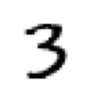

In [15]:
show_image(three_tensors[1]);

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

# torch.stack(seven_tensors) - Combina uma lista de tensores (cada um com shape [28, 28]) em um único tensor 3D com shape: [N, 28, 28]  ← N = número de imagens.
# .float(): Converte os valores dos pixels de inteiros (0–255) para ponto flutuante (float32)
# / 255: Normaliza os valores de pixel para o intervalo [0.0, 1.0], o que é essencial para redes neurais (melhora o desempenho e a estabilidade do treinamento).

torch.Size([6131, 28, 28])

In [18]:
len(stacked_threes.shape) # número de dimensões do tensor

3

In [19]:
stacked_threes.ndim # número de dimensões do tensor

3

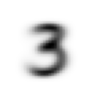

In [23]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

# mean(0): Faz a média ao longo do primeiro eixo. Para cada pixel pega o valor médio desse pixel em todas as imagens. O resultado é um único tensor de shape [28, 28].
# show_image: mostra esse tensor como uma imagem usando função do fastai

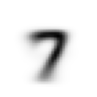

In [21]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

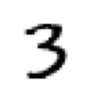

In [22]:
a_3 = stacked_threes[1]
show_image(a_3);

# Faz processo semelhante com tensor da segunda imagem de stacked_threes

In [24]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

# Medindo o quão diferente a imagem criada é da original:
# - a_3 - mean3: diferença pixel a pixel
# .abs(): valor absoluto da diferença (sem sinal)
# .mean(): média dessas diferenças
# **2: eleva ao quadrado (penaliza diferenças grandes)
# .sqrt(): raiz quadrada

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

In [ ]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

### NumPy Arrays and PyTorch Tensors

In [27]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [28]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [30]:
tns[1]

tensor([4, 5, 6])

In [31]:
tns[:,1]

tensor([2, 5])

In [32]:
tns[1,1:3]

tensor([5, 6])

In [33]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [34]:
tns.type()

'torch.LongTensor'

In [35]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Computing Metrics Using Broadcasting

In [37]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

# Esse código mostra a preparação dos dados do set de validação de maneira semelhante ao que foi feito para o teste, explicado em código acima.

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [38]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

# Define uma função para medir o quão diferente a imagem criada é da original. Reaalizado para não ter que escrever a equação completa toda vez que ela for utilizada.
# a - b: Calcula a diferença pixel a pixel entre as duas imagens (ou batches de imagens).
# .abs(): Transforma todas as diferenças em valores positivos (módulo).
# .mean((-1, -2)): Calcula a média nas últimas duas dimensões, ou seja, altura e largura da imagem (28×28). Ou seja, calcula a média dos valores dos pixels em cada imagem. 

tensor(0.1114)

In [41]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

# valid_3_tens: É um tensor com várias imagens do dígito 3, da validação.
# mean3: É a média de todas as imagens de treino do número 3.Shape: [28, 28]
# mnist_distance: Aplica a função de distância, criada no codigo anterior, em todas as imagens do batch, comparando cada uma com mean3
# valid_3_dist será um tensor de shape [N], onde cada valor representa a distância média absoluta de uma imagem de validação para a imagem média mean3.

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [42]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [43]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [45]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

# Ela recebe uma imagem x (ou um batch de imagens) e compara: 
# Quão parecida ela é com o "3 médio" (mean3)
# Quão parecida ela é com o "7 médio" (mean7)
# Se for mais parecida com o 3, retorna True. Se for mais parecida com o 7, retorna False

In [46]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [47]:
is_3(valid_3_tens)

# Utiliza a função criada acima para averiguar se as imagens do set de validação do 3 são mais parecidas com o "3 médio" ou com o "7 médio"

tensor([ True, False, False,  ...,  True,  True, False])

In [48]:
accuracy_3s =  is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

# .float(): Converte os valores True → 1.0 e False → 0.0
# .mean(): Calcula a média dos 0s e 1s, que é igual à acurácia

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent (SGD)

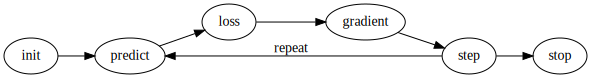

In [49]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [50]:
def f(x): return x**2

# Definindo uma função quadratica

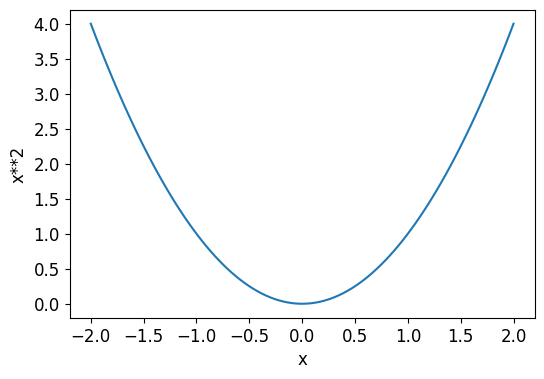

In [51]:
plot_function(f, 'x', 'x**2')

# Plotando a função quadratica

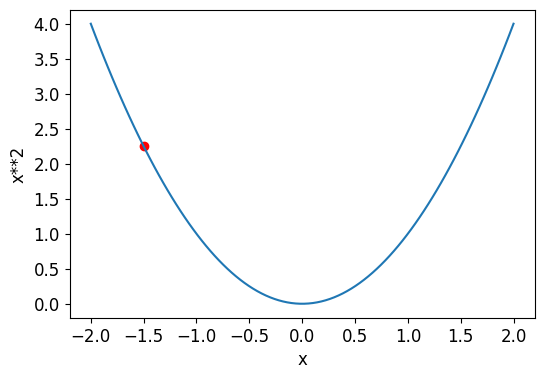

In [52]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

# Destaca um ponto no gráfico: x = -1,5; y = f(-1.5)

### Calculating Gradients

In [55]:
xt = tensor(3.).requires_grad_()

# tensor(3.): Cria um tensor escalar com o valor 3.0 (do tipo float).
# requires_grad_(): Diz ao PyTorch para rastrear esse tensor durante as operações, para que seja possível fazer backpropagation (cálculo de derivadas).

In [59]:
yt = f(xt)
yt

# Faz (3)**2 = 9. 
# Mostra histórico de autograd grad_fn=<PowBackward0>: Isso significa que é posivel obter a derivada de x**2, nossa função.

tensor(9., grad_fn=<PowBackward0>)

In [60]:
yt.backward()

# Calcula a derivada da função que gerou yt, em relação às variáveis que estão dentro de xt (e que têm requires_grad=True).

In [61]:
xt.grad

# Mostra o valor do gradiente que foi armazenado em xt. 

tensor(12.)

In [62]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

# Cada número pode agora participar de cálculos cujos gradientes serão rastreados

tensor([ 3.,  4., 10.], requires_grad=True)

In [65]:
def f(x): return (x**2).sum()

# Define função que: 
# Eleva cada elemento de x ao quadrado
# Soma todos os quadrados
# Retorna um único número (um escalar)

yt = f(xt)
yt

# Aplica a função a xt

tensor(125., grad_fn=<SumBackward0>)

In [64]:
yt.backward()
xt.grad

# Calcula os gradientes (derivadas) da função que gerou yt, em relação às variáveis que estão dentro de xt (e que têm requires_grad=True).

tensor([ 6.,  8., 20.])

### Stepping With a Learning Rate

### An End-to-End SGD Example

In [66]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

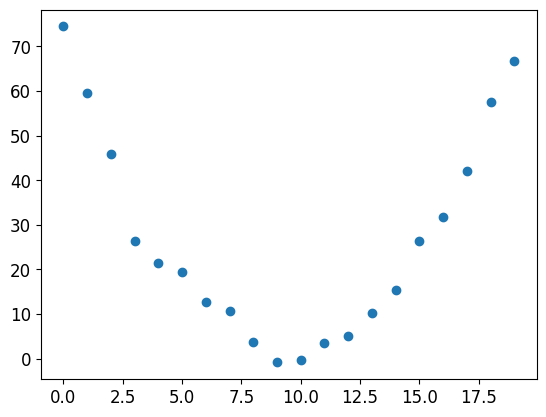

In [67]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

# Criando função matemática em forma de U, com ruído - número aleatório*3.
# Essa vai ser a função considerada REAL, usada para comparação com as predições. 
# Plotando essa função

In [74]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# Define uma função matemática f. 

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean()

# Define uma função do Python que calcula o mean squared error.
# preds - targets: Calcula o erro (diferença) entre a predição e o valor real.
# **2: Eleva o erro ao quadrado (para tornar tudo positivo e penalizar erros maiores).
# mean(): Calcula a média de todos os erros quadráticos.
# Isso dá um único valor que representa o quão "longe" em média suas previsões estão dos valores reais.

#### Step 1: Initialize the parameters

In [70]:
params = torch.randn(3).requires_grad_()

# torch.randn (3): Cria um tensor com 3 valores aleatórios.
# .requires_grad_(): Diz ao Pytorch rastrear os gradientes em relação a esses parâmetros

In [73]:
#hide
orig_params = params.clone()

# Cria uma cópia independente dos valores atuais de params. 

#### Step 2: Calculate the predictions

In [94]:
preds = f(time, params)

# Faz predição de velocidade usando a função definida, de acordo com time (definido antes) e com os parametros aleatórios gerados

In [95]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

# Criando uma função de visualização para compara: Valores reais (speed, em azul), Predições do modelo (preds, em vermelho)

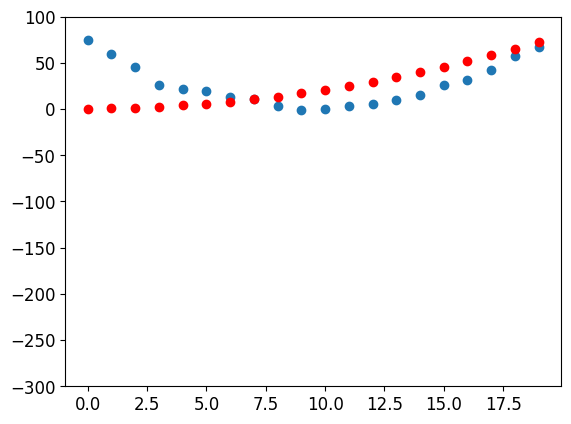

In [96]:
show_preds(preds)

#### Step 3: Calculate the loss

In [97]:
loss = mse(preds, speed)
loss

# Calcula mean squared error entre as predições (pred) e os valores reais (speed)

TensorBase(811.9952, grad_fn=<AliasBackward0>)

#### Step 4: Calculate the gradients

In [98]:
loss.backward()
params.grad

# Calcula os gradientes (derivadas) da função que definiu loss (MSE), em relação às variáveis que estão dentro de params (e que têm requires_grad=True).

tensor([ 3.6727e+03,  2.3862e+02, -2.4820e+00])

In [99]:
params.grad * 1e-5

# Multiplica os gradientes (derivadas) por um número pequeno, para definir o tamanho do passo na direção do gradiente que vamos dar (learning rate).

tensor([ 3.6727e-02,  2.3862e-03, -2.4820e-05])

In [100]:
params

tensor([0.1971, 0.0507, 0.5225], requires_grad=True)

#### Step 5: Step the weights. 

In [101]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

# 1. lr = 1e-5: Define o learning rate — a taxa de quanto você vai ajustar os parâmetros em cada passo.

# 2. params.data -= lr * params.grad.data: Esse é o passo de atualização dos parâmetros.
# params.grad contém os gradientes em relação a loss
# Multiplicando por lr, você obtém pequenos ajustes que reduzem o erro.
# .data é usado aqui para acessar diretamente os valores crus dos parâmetros, sem envolver o sistema de autograd do PyTorch.
# params.grad = None: Zera o gradiente para a próxima iteração. Isso é importante porque o PyTorch acumula os gradientes por padrão (útil para alguns métodos avançados). Se você não zerar, na próxima chamada de .backward(), os gradientes seriam somados com os antigos.

In [103]:
preds = f(time,params)
mse(preds, speed)

# f(time, params): Gera as predições atuais do modelo com os parâmetros ajustados.
# mse (preds, speed): Calcula nova MSE. 

TensorBase(714.8047, grad_fn=<AliasBackward0>)

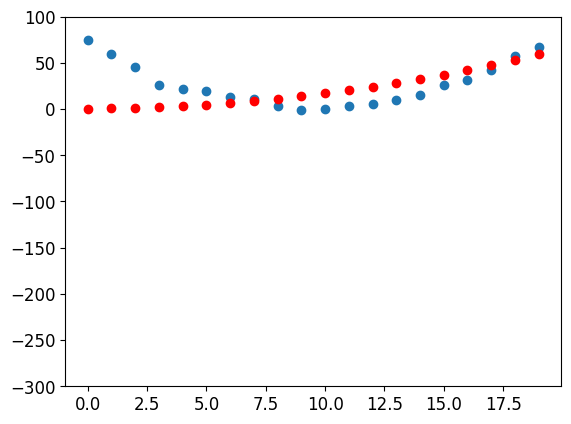

In [104]:
show_preds(preds)

In [107]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

# Criando função do Python que automatiza tudo que fizemos até agora:
# preds = f(time, params)	Calcula as predições atuais do modelo
# loss = mse(...)	Calcula o erro quadrático médio (MSE)
# loss.backward()	Calcula os gradientes dos parâmetros
# params.data -= ...	Aplica um passo de gradiente descendente
# params.grad = None	Zera os gradientes para a próxima iteração
# if prn: ...	(Opcional) imprime o valor do erro atual (loss)
# return preds	Retorna as predições atuais após o passo

#### Step 6: Repeat the process 

In [108]:
for i in range(10): apply_step(params)

# Repete os procedimento da função anterior 10 vezes e imprime a loss após cada procedimento
# A loss diminui a cada procedimento

714.8046875
696.4103393554688
692.9266967773438
692.2646484375
692.1365356445312
692.109375
692.101318359375
692.0970458984375
692.09326171875
692.0896606445312


In [109]:
#hide
params = orig_params.detach().requires_grad_()

# Essa linha reinicializa os parametros (params) com valores originais
# orig_params: Contém os valores salvos antes do treinamento (por exemplo, a inicialização aleatória original).
# detach(): Cria um novo tensor que não está ligado ao grafo computacional anterior. Isso evita que o PyTorch tente rastrear gradientes antigos e mantenha dependências desnecessárias.
# requires_grad_(): Ativa novamente o rastreamento de gradientes para params, como é necessário para o backward() funcionar corretamente.

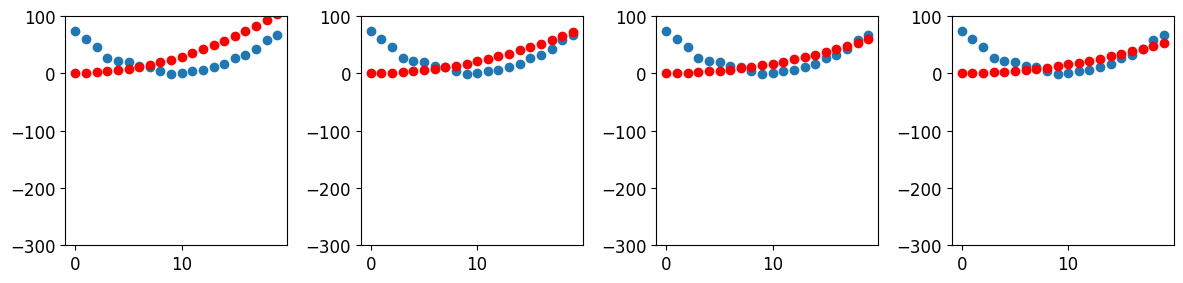

In [110]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# Cria gráfico mostrando a melhora das predições com ciclos de treinamento

#### Step 7: stop

### Summarizing Gradient Descent

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


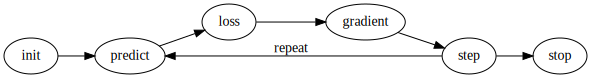

In [111]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNIST Loss Function

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights = init_params((28*28,1))

In [ ]:
bias = init_params(1)

In [ ]:
(train_x[0]*weights.T).sum() + bias

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

In [ ]:
corrects = (preds>0.0).float() == train_y
corrects

In [ ]:
corrects.float().mean().item()

In [ ]:
with torch.no_grad(): weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

In [ ]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
torch.where(trgts==1, 1-prds, prds)

In [ ]:
mnist_loss(prds,trgts)

In [ ]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

### Sigmoid

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### SGD and Mini-Batches

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

## Putting It All Together

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

In [ ]:
preds = linear1(batch)
preds

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

In [ ]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

### Creating an Optimizer

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

## Adding a Nonlinearity

In [ ]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

### Going Deeper

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.